In [6]:
#Load some modules etc
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler

from sympy import *
import scipy as sc
import numpy as np
init_printing()

# Introduction
In this notebook I will explore the intra-compartment scaling up of individual flux to the ecosystem level. 

We start with a basic model for the carbon biomass change of a single species. In this model we are only interested in the exponential growth phase as this is where the empirical data is. For a given bacterial species the uptake and loss of carbon can be represented as two simple parameters, $\mu$ and $R$ respectively. The values of $\mu$ and $R$ are temperature dependent and as such we represent them as boltzman curves with the form
\begin{align}
    B(T) = B_0 exp(\frac{E}{k}(\frac{1}{T} - \frac{1}{T_{ref}}))
\end{align}

This $\mu$ term represents a maximum rate of carbon uptake of which a proportion is allocated to biomass $\epsilon$. Thus the rate of change of carbon biomass ($C$) is given as:
\begin{align}
    \frac{1}{C}\frac{dC}{dt} = \epsilon \mu - R
\end{align}

Assuming that at some reference temperature the species has positive growth ($\frac{dC}{dt} > 0$) we can look at the temperature response curves of the loss ($R$) and uptake ($\epsilon \mu$) terms.


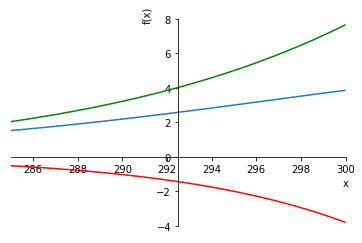

In [38]:
B_0,E,k,T,Tref = var("B_0,E,k,T,T_{ref}")

B = B_0 * exp(-(E/k)* ((1/T)-(1/Tref)))

mu = 0.5 * B.subs({B_0:10,E:0.65,k:8.617e-5,Tref:295.0})
R  = - B.subs({B_0:2,E:0.98,k:8.617e-5,Tref:295.0})

p = plot((R,(T,285,300)),(mu,(T,285,300)),(mu+R,(T,285,300)),show = False)
p[0].line_color = 'red'
p[1].line_color = 'green'
p.show()

If we set 
\begin{align}
\epsilon \mu - R = r 
\end{align}

then we get the classic exponetial growth model 
\begin{align}
\frac{dC}{dt} = rC 
\end{align}

which we can get the population at time $t$ by integrating to get 
\begin{align}
C(t) &= C(0) e^{rt} \\
     &= C(0) e^{(\epsilon \mu - R)t}
\end{align}

For a single species we can look at the temperature response of biomass at a given point in time by getting the temperature response of the $r$ parameter. This is done by using a taylor series expansion of the $\epsilon \mu - R$ term.

In [71]:
u0, Eu, R0, ER = var("\mu_0, E_\mu, R_0, E_R")

R = R0 * exp(-(ER*((1/(k*T))-(1/(k*Tref)))))
u = u0 * exp(-(Eu*((1/(k*T))-(1/(k*Tref)))))

Tr,Tra = var("T_r,T_{ra}")

R = R.subs({1/(k*T):Tr,1/(k*Tref):Tra})
u = u.subs({1/(k*T):Tr,1/(k*Tref):Tra})

e = var("\epsilon")

simplify(exp(ln(e*u - R).series(Tr,Tra,2).removeO()))

So in this approximation $r_0 = \epsilon \mu_0 - R_0$ and $E_r = \frac{E_R R_0 - E_\mu \epsilon \mu_0}{\epsilon \mu_0 - R_0}$. so we can express the 